In [1]:
## import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Reading the dataset
df = pd.read_csv('AirfoilSelfNoise.csv')

In [4]:
df.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
## Check the null values
df.isnull().sum()

f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64

In [7]:
## Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [8]:
## Correlation between the columns
df.corr()

,f,alpha,c,U_infinity,delta,SSPL
f,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
alpha,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
c,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
U_infinity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
delta,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
SSPL,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


<Axes: >

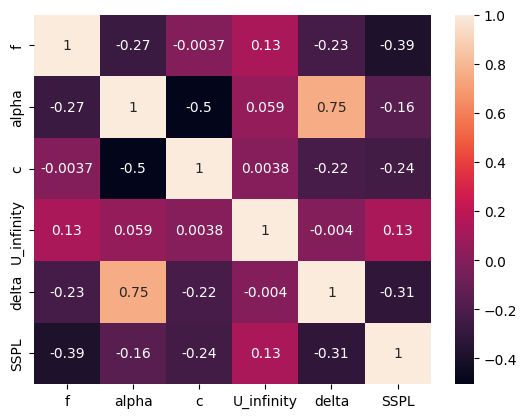

In [11]:
## Heatmap
sns.heatmap(df.corr(),annot=True)

<Axes: >

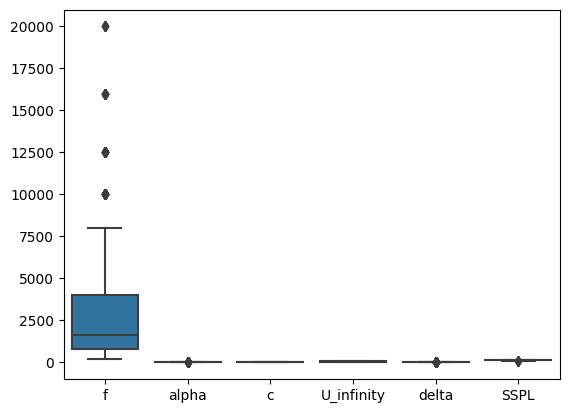

In [12]:
## Checking the outliers -- boxplot
sns.boxplot(data=df)

In [13]:
## Dependent and independent features
X = df.drop('SSPL',axis =1)
y = df[['SSPL']]

In [15]:
X,y

(         f  alpha       c  U_infinity     delta
 0      800    0.0  0.3048        71.3  0.002663
 1     1000    0.0  0.3048        71.3  0.002663
 2     1250    0.0  0.3048        71.3  0.002663
 3     1600    0.0  0.3048        71.3  0.002663
 4     2000    0.0  0.3048        71.3  0.002663
 ...    ...    ...     ...         ...       ...
 1498  2500   15.6  0.1016        39.6  0.052849
 1499  3150   15.6  0.1016        39.6  0.052849
 1500  4000   15.6  0.1016        39.6  0.052849
 1501  5000   15.6  0.1016        39.6  0.052849
 1502  6300   15.6  0.1016        39.6  0.052849
 
 [1503 rows x 5 columns],
          SSPL
 0     126.201
 1     125.201
 2     125.951
 3     127.591
 4     127.461
 ...       ...
 1498  110.264
 1499  109.254
 1500  106.604
 1501  106.224
 1502  104.204
 
 [1503 rows x 1 columns])

In [16]:
## Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [17]:
X_train.shape,X_test.shape

((1007, 5), (496, 5))

In [18]:
df.shape

(1503, 6)

In [20]:
## Standardization of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-0.7480904 ,  0.77881063, -0.93073591,  1.27392301,  0.24272853],
       [ 2.16400555, -0.31495244, -1.20068149,  0.26112217, -0.77497795],
       [-0.28828578,  0.09520871,  0.14904642, -0.75808881, -0.14127908],
       ...,
       [-0.70824067,  0.77881063, -0.93073591, -0.75808881,  0.31796865],
       [-0.80479964,  0.96680116, -0.39084475, -1.26448923,  2.38655541],
       [ 0.63132347,  1.03516135, -1.20068149,  1.27392301,  0.09690549]])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21568\752764013.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

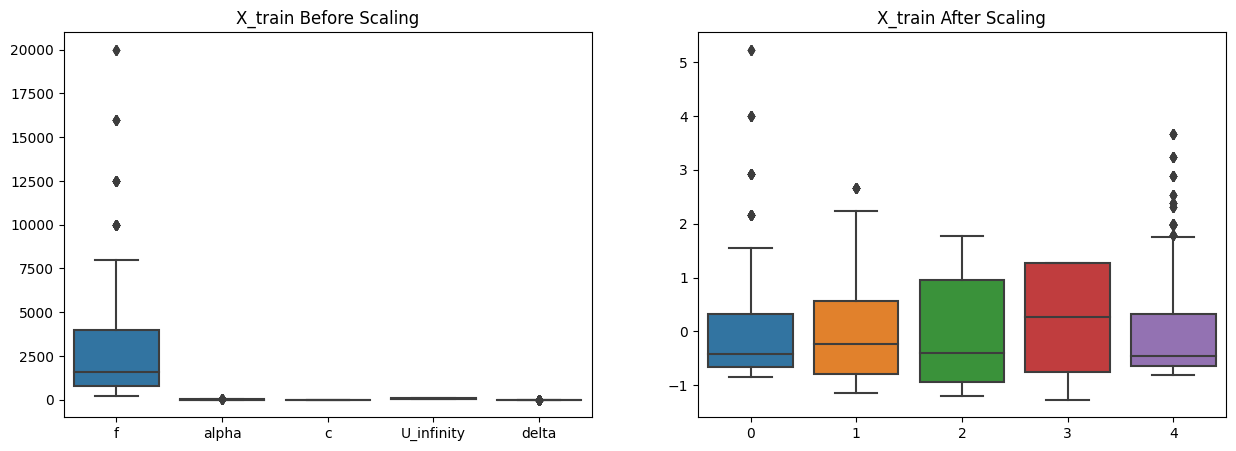

In [22]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

In [23]:
## Saving the model
import pickle
file = open('../models/standardscaler.pkl','wb')
pickle.dump(scaler,file)
file.close()

## Linear Regression

Mean absolute error 3.7288137950232936
R2 Score 0.5124474986138434


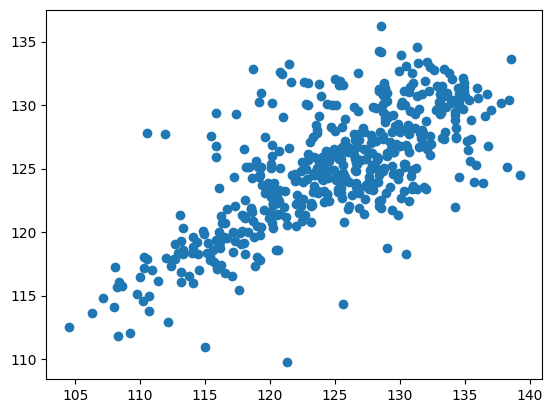

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
# accuracy = accuracy_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
# print("Accuracy",accuracy)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error 4.544515502758648
R2 Score 0.3386719676316329


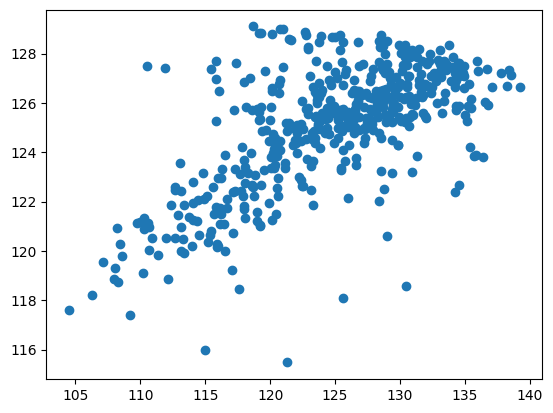

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Ridge Regression

Mean absolute error 3.729814344423432
R2 Score 0.512336279411592


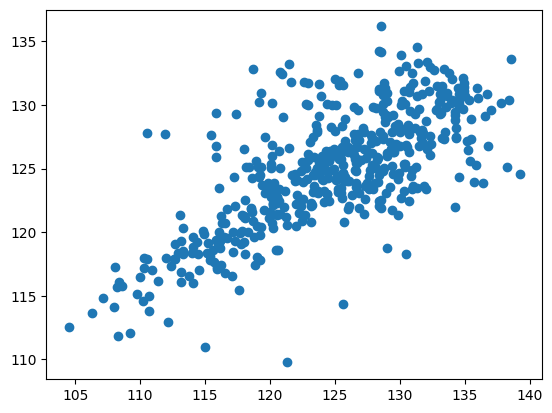

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)


## Cross Validation Lasso

Mean absolute error 3.7297039958914464
R2 Score 0.5123254828648107


D:\ml\projects\Airfoil Noise Detection\airfoilNoiseDetection\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


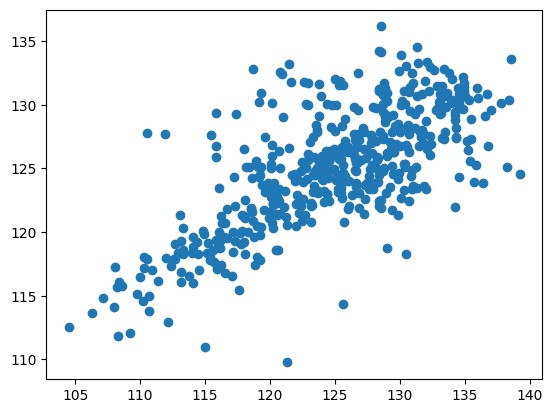

In [30]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## ElasticNet Regression

Mean Absolute Error 4.6364213625608475
R2 Score 0.3195546434464114


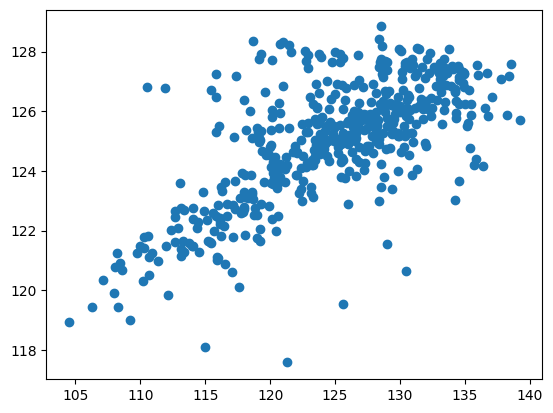

In [31]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

### Lets check the models without scaling

Mean Absolute Error 4.816780798189354
R2 Score 0.2485807097484366


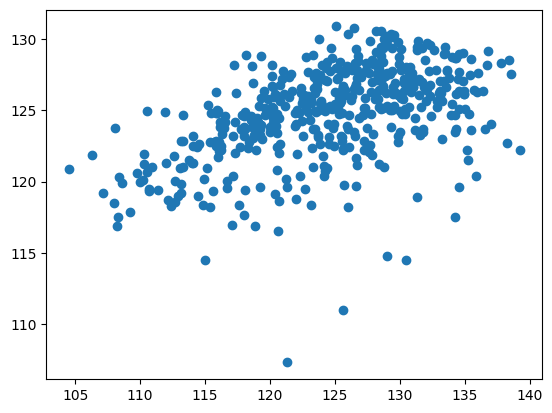

In [32]:
elastic = ElasticNet()
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 5.079153826186791
R2 Score 0.13651139569002435


D:\ml\projects\Airfoil Noise Detection\airfoilNoiseDetection\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


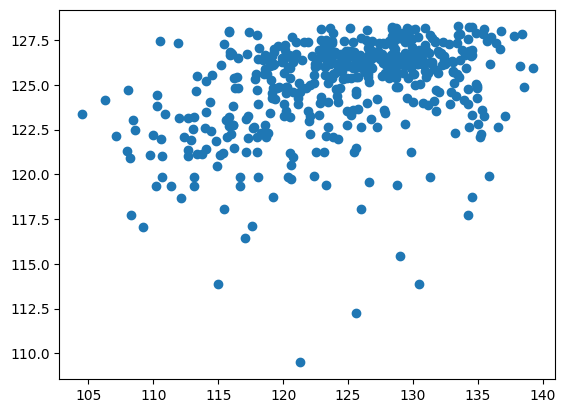

In [33]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train,y_train)
y_pred = lassocv.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 3.964532137116463
R2 Score 0.47691441677856783


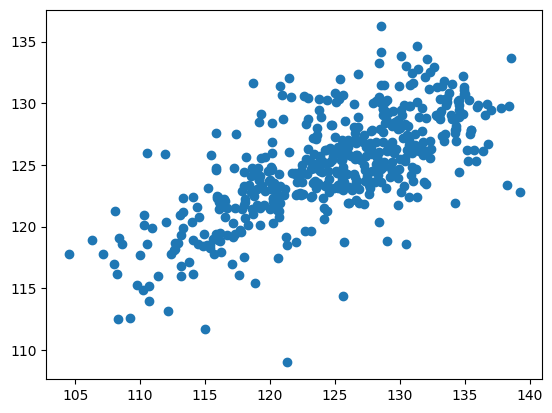

In [34]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)


Mean absolute error 4.816570293396009
R2 Score 0.24663111710848962


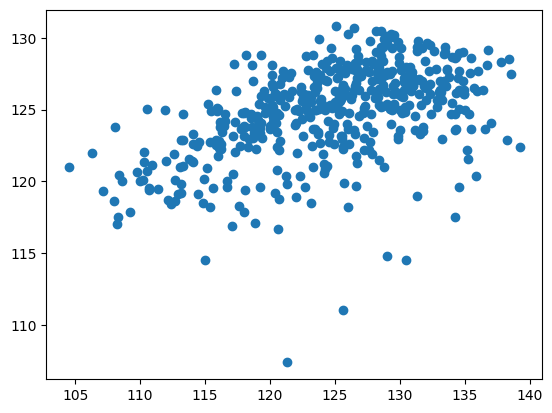

In [35]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 3.7288137950232936
R2 Score 0.5124474986138431


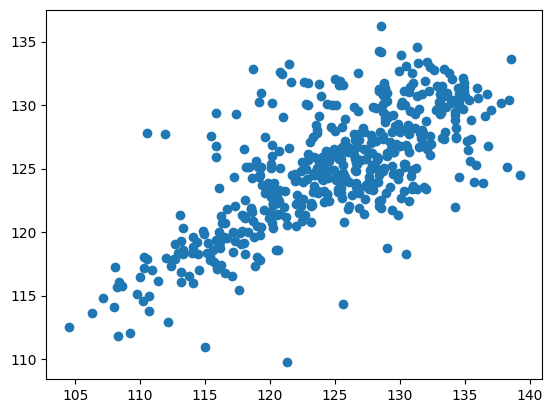

In [36]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
# accuracy = accuracy_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
# print("Accuracy",accuracy)
plt.scatter(y_test,y_pred)

## Let's check the Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train_scaled)
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)

LinearRegression()

In [43]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = lin_reg2.predict(X_test)
metric = mean_absolute_percentage_error(y_test,y_pred)
print("Polynomial degree : 2")
print("Mean absolute percentage error :")
print(metric[0])

D:\ml\projects\Airfoil Noise Detection\airfoilNoiseDetection\venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 5 features, but LinearRegression is expecting 21 features as input.